In [1]:
%%time

import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime

PRES_CMTES = ['BENNET FOR AMERICA','BIDEN FOR PRESIDENT','BULLOCK FOR PRESIDENT','PETE FOR AMERICA, INC.','KAMALA HARRIS FOR THE PEOPLE','AMY KLOBUCHAR VICTORY COMMITTEE','WAYNE MESSAM FOR AMERICA, INC.','TIM RYAN FOR AMERICA','WARREN FOR PRESIDENT, INC.','MARIANNE WILLIAMSON FOR PRESIDENT','FRIENDS OF ANDREW YANG','CORY 2020','JULIAN FOR THE FUTURE','FRIENDS OF JOHN DELANEY','TULSI NOW','BETO FOR AMERICA','BERNIE 2020','JOE SESTAK FOR PRESIDENT','TOM STEYER 2020']
CORE_COLUMNS = ['CMTE_NM','RPT_TP','NAME','CITY','STATE','ZIP_CODE','TRANSACTION_DT','TRANSACTION_AMT','PURPOSE','CATEGORY']


# Read in data
df_header = pd.read_csv("~/Documents/Insight/Data - Insight/oppexp_header_file.csv")
df = pd.read_csv("~/Documents/Insight/Data - Insight/oppexp20/oppexp.txt", delimiter="|", low_memory=False, names=df_header.columns, index_col=False)
cmte_header = pd.read_csv("~/Documents/Insight/Data - Insight/cm20/cm_header_file.csv") # pull in header for committee names file
cmte_names = pd.read_csv("~/Documents/Insight/Data - Insight/cm20/cm.txt", delimiter="|", names=cmte_header.columns) # pull in committee names file

# Clean data
df = ( df.set_index('CMTE_ID') ).join(cmte_names.set_index('CMTE_ID')) 
df = df.reset_index()
df['TRANSACTION_DT']=pd.to_datetime(df['TRANSACTION_DT'],errors = 'coerce')
df = df[df['TRANSACTION_AMT']>0]
df = df[df.apply(lambda x: x.CMTE_NM in PRES_CMTES, axis=1)]

print('timed')

timed
Wall time: 35.5 s


In [3]:
%%time

from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=30, min_samples=100).fit_predict(df[['TRANSACTION_AMT']])
#clustering.labels_

print(clustering) 

[0 0 0 ... 0 0 0]
Wall time: 6.67 s


In [9]:
outliers = df[clustering==-1]
outliers = outliers.sort_values('TRANSACTION_DT',ascending=False)

In [10]:
# Save the outliers in a csv
outliers.to_csv('outliers2020.csv')

In [11]:
outliers.loc[outliers['CMTE_NM']=='BERNIE 2020',CORE_COLUMNS]

,CMTE_NM,RPT_TP,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,PURPOSE,CATEGORY
341998,BERNIE 2020,Q2,"TIGEREYE PROMOTIONS, LLC",TROY,OH,453732560,2019-06-30,238194.96,BUTTONS/BUMPERSTICKERS/SIGNS/TS,NaN
341055,BERNIE 2020,Q2,ACTBLUE,SOMERVILLE,MA,021443132,2019-06-30,133088.20,MERCHANT FEES,NaN
343723,BERNIE 2020,Q2,BLUE WAVE POLITICAL PARTNERS,CHATTANOOGA,TN,374022893,2019-06-30,20501.05,COMPLIANCE/ACCOUNTING,NaN
343333,BERNIE 2020,Q2,REBECCA K RAST,LANCASTER,PA,176033337,2019-06-28,4176.74,SALARY,NaN
342978,BERNIE 2020,Q2,MICHAEL D FUTCH,WASHINGTON,DC,200094405,2019-06-28,3660.56,SALARY,NaN
...,...,...,...,...,...,...,...,...,...,...
336966,BERNIE 2020,Q1,ACTBLUE,SOMERVILLE,MA,021443132,2019-02-24,36065.04,MERCHANT FEES,NaN
336823,BERNIE 2020,Q1,CLARKE & SAMPSON,ALEXANDRIA,VA,223145404,2019-02-23,25271.00,INSURANCE,NaN
336467,BERNIE 2020,Q1,"AISLE 518 STRATEGIES, LLC",ARLINGTON,VA,222073925,2019-02-21,500000.00,DIGITAL ADVERTISING,NaN
336377,BERNIE 2020,Q1,ACTBLUE,SOMERVILLE,MA,021443132,2019-02-21,38041.48,MERCHANT FEES,NaN


In [4]:
max(df.TRANSACTION_DT)

Timestamp('2019-12-30 00:00:00')

In [3]:
# Read in data
df_header = pd.read_csv("~/Documents/Insight/Data - Insight/oppexp_header_file.csv")
df = pd.read_csv("~/Documents/Insight/Data - Insight/oppexp20/oppexp.txt", delimiter="|", low_memory=False, names=df_header.columns, index_col=False)
cmte_header = pd.read_csv("~/Documents/Insight/Data - Insight/cm20/cm_header_file.csv") # pull in header for committee names file
cmte_names = pd.read_csv("~/Documents/Insight/Data - Insight/cm20/cm.txt", delimiter="|", names=cmte_header.columns) # pull in committee names file

# Clean data
df = ( df.set_index('CMTE_ID') ).join(cmte_names.set_index('CMTE_ID')) 
df = df.reset_index()
df['TRANSACTION_DT']=pd.to_datetime(df['TRANSACTION_DT'],errors = 'coerce')
df = df[df['TRANSACTION_AMT']>0]

In [23]:
max(df.loc[df.CMTE_NM=='FRIENDS OF ANDREW YANG','TRANSACTION_DT'])

Timestamp('2019-06-30 00:00:00')

In [14]:
df['cluster']=clustering
sum(df['PURPOSE'].value_counts()[:20])/sum(df['PURPOSE'].value_counts())
df['PURPOSE'].value_counts()[:20]

TRAVEL                         8747
SALARY                         5358
TRANSPORTATION                 4733
PAYROLL                        1851
LODGING                        1620
INTERNET ADVERTISING           1498
OFFICE SUPPLIES                1256
CREDIT CARD PROCESSING FEES     855
SOFTWARE                        559
ONLINE ADVERTISING              537
ADVERTISING                     506
MERCHANT FEES                   470
CREDIT CARD PROCESSING FEE      455
POSTAGE                         442
PRINTING                        416
SUPPLIES                        375
STAFF TRAVEL                    347
MEALS                           334
EVENT PLANNING FEES             305
EVENT SUPPLIES                  260
Name: PURPOSE, dtype: int64

In [17]:
cat_dict = {'TRAVEL': 'TRANSPORTATION',
'TRANSPORTATION': 'TRANSPORTATION',
'STAFFTRAVEL': 'TRANSPORTATION',
'SALARY': 'SALARY',
'PAYROLL':'PAYROLL',
'LODGING':'LODGING',
'INTERNETADVERTISING': 'ADVERTISING',
'ONLINEADVERTISING': 'ADVERTISING',
'ADVERTISING': 'ADVERTISING',
'OFFICESUPPLIES': 'OFFICESUPPLIES',
'POSTAGE': 'OFFICESUPPLIES',
'PRINTING': 'OFFICESUPPLIES',
'SUPPLIES': 'OFFICESUPPLIES',
'CREDITCARDPROCESSINGFEES':'CREDITCARDPROCESSINGFEES',
'SOFTWARE':'SOFTWARE',
'MERCHANTFEES': 'BANKFEES',
'CREDITCARDPROCESSINGFEE': 'BANKFEES',
'MEALS':'MEALS',
'EVENTPLANNINGFEES':'EVENTPLANNINGFEES',
'EVENTSUPPLIES':'EVENTSUPPLIES'}
cat_dict['TRAVEL']

'TRANSPORTATION'

In [31]:
df=df[df['PURPOSE'].isin(cat_dict.keys())]

In [33]:
df.loc['CATS']=df.PURPOSE.apply(lambda x: cat_dict[x])

In [34]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID,cluster,CATS
187063,C00508416,A,2019.0,Q1,2.019082e+17,23,F3P,SB,"BARRETT, ISABELLE",DES MOINES,...,20813,P,P,DEM,Q,NaN,NONE,P00006213,0.0,PAYROLL
187065,C00508416,A,2019.0,Q1,2.019082e+17,23,F3P,SB,"BARRETT, ISABELLE",DES MOINES,...,20813,P,P,DEM,Q,NaN,NONE,P00006213,0.0,PAYROLL
187067,C00508416,A,2019.0,Q1,2.019082e+17,23,F3P,SB,"BARRETT, ISABELLE",DES MOINES,...,20813,P,P,DEM,Q,NaN,NONE,P00006213,0.0,PAYROLL
187068,C00508416,A,2019.0,Q1,2.019082e+17,23,F3P,SB,"BARRETT, ISABELLE",DES MOINES,...,20813,P,P,DEM,Q,NaN,NONE,P00006213,0.0,PAYROLL
187070,C00508416,A,2019.0,Q1,2.019082e+17,23,F3P,SB,"BENNETT, JESS",INDEPENDENCE,...,20813,P,P,DEM,Q,NaN,NONE,P00006213,0.0,PAYROLL


In [37]:
df['PURPOSE'].value_counts().keys()

Index(['TRAVEL', 'SALARY', 'TRANSPORTATION', 'PAYROLL', 'LODGING', 'SOFTWARE',
       'ADVERTISING', 'POSTAGE', 'PRINTING', 'SUPPLIES', 'MEALS'],
      dtype='object')

In [74]:
np.delete(top_cats,'PAYROLL')

Index(['TRAVEL', 'SALARY', 'TRANSPORTATION', 'PAYROLL', 'LODGING', 'SOFTWARE',
       'ADVERTISING', 'POSTAGE', 'PRINTING', 'SUPPLIES', 'MEALS'],
      dtype='object')

In [75]:
#ok, now, do the clustering per category
indices_with_cat = []
cluster_number = 0
top_cats = df['PURPOSE'].value_counts().keys().values
for cat in top_cats:
    indices_with_cat = (df['PURPOSE']==cat)
    df.loc[indices_with_cat,'cluster2'] = DBSCAN(eps=30, min_samples=10).fit_predict(df.loc[indices_with_cat,['TRANSACTION_AMT']]) + cluster_number
    cluster_number += 10
    
# send cluster2 to cluster3 with x%10=0 as 0
df['cluster3']=df['cluster2'].apply(lambda x: 0 if x%10==0 else x)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

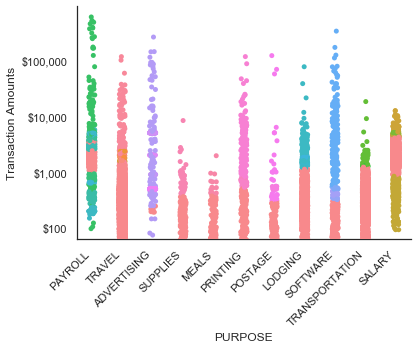

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#from matplotlib import cmap
import matplotlib.ticker as mtick

#Set the color palette
sns.set_palette(sns.color_palette("bright")) # worked once
#sns.set_palette("bright") # doesn't work
#sns.set(style="white", color_codes=True)
rows_in_top_cats = df.loc[df['PURPOSE'].isin(top_cats)]

g = sns.stripplot(x='PURPOSE', y='TRANSACTION_AMT',
                  hue=(rows_in_top_cats['cluster3'] + 1),
                  data=rows_in_top_cats[['TRANSACTION_AMT','PURPOSE']])
#cmap=cmap, 
sns.despine()
#/max(rows_in_top_cats)
#g.fig.get_axes()[0].set_yscale('log')
g.set_yscale('log')
g.set(ylabel='Transaction Amounts')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
g.yaxis.set_major_formatter(tick) 
#g.scatter(t,,c=clustering)

#ok, now, show the clusters in the data

# Put a legend to the right of the current axis
#g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#handles, labels = g.get_legend_handles_labels()

g.get_legend().remove()

plt.tight_layout()
#plt.gcf().subplots_adjust(bottom=0.55)
plt.xticks(rotation=45,ha='right')
#image_to_save = g.get_figure()
#image_to_save.savefig('jitter_plot_2019.png', transparent=True) 

timed
Wall time: 523 ms


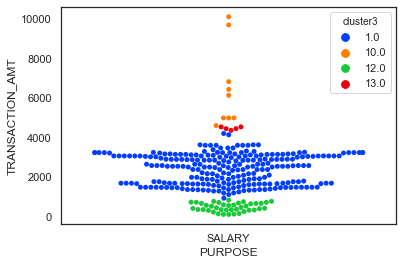

In [121]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#from matplotlib import cmap
import matplotlib.ticker as mtick

num = 300
rows_in_top_cats = (df.loc[df['PURPOSE']=='SALARY'])[:num]

sns.swarmplot(x='PURPOSE', y='TRANSACTION_AMT',
              hue=((rows_in_top_cats['cluster3'])[:num] + 1),
              data=rows_in_top_cats)
                  #hue=(rows_in_top_cats['cluster3'] + 1),
                  #data=rows_in_top_cats)#[['TRANSACTION_AMT','PURPOSE']])
#g.get_legend().remove()
print('timed')

In [116]:
len(df.loc[df['PURPOSE']=='SALARY'])

5358

In [100]:
df.loc[df['PURPOSE']=='SALARY','cluster3'].value_counts()

0.0     4666
11.0     436
12.0      99
9.0       84
15.0      23
14.0      18
13.0      11
16.0      11
17.0      10
Name: cluster3, dtype: int64